In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
coffee_data=pd.read_csv("/content/drive/MyDrive/Coffe_sales.csv")
coffee_data

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


In [ ]:
num_columns = coffee_data.shape[1]
print(f"Number of columns: {num_columns}")

# Check for duplicate columns (by comparing column content)
duplicate_columns = coffee_data.T.duplicated().sum()
print(f"Number of duplicate columns: {duplicate_columns}")

# Check for missing values
missing_values = coffee_data.isnull().sum()
print("\nMissing values per column:")
print(missing_values)

Number of columns: 11
Number of duplicate columns: 0

Missing values per column:
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


In [ ]:
coffee_data.describe()
coffee_data.dtypes
coffee_data['Date']= pd.to_datetime(coffee_data['Date']) ## converting the object datatype to datetime
coffee_data['Month']=coffee_data['Date'].dt.month
coffee_data['Year']=(coffee_data['Date'].dt.year).astype('int')
grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)
grouped_data
grouped_data.dtypes

/tmp/ipython-input-705887670.py:6: FutureWarning: The provided callable <function mean at 0x7958dd72c9a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)


dtype('float64')

In [ ]:
max_money_by_month = coffee_data.groupby('Month')['money'].max()
display(max_money_by_month)

,money
Month,
1,35.76
2,35.76
3,38.70
4,38.70
5,37.72
6,37.72
7,37.72
8,32.82
9,35.76


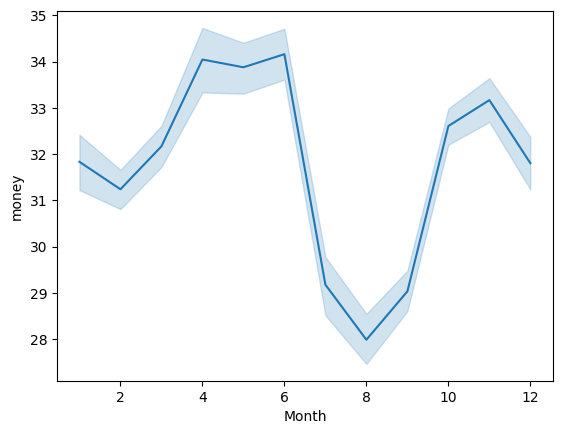

<Axes: xlabel='Year', ylabel='money'>

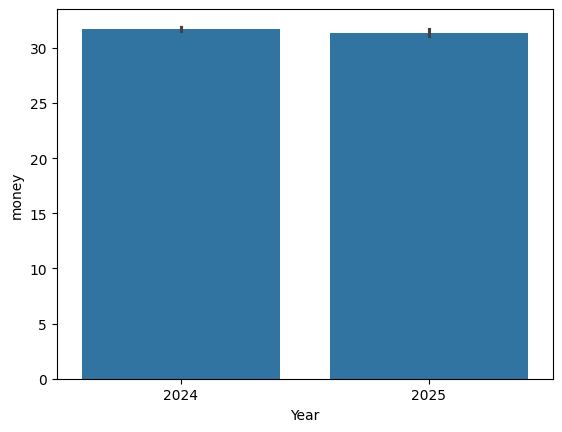

In [ ]:
sns.lineplot(x=coffee_data['Month'],y='money',data=coffee_data)
plt.show()
sns.barplot(data= coffee_data,x='Year',y= coffee_data['money'])

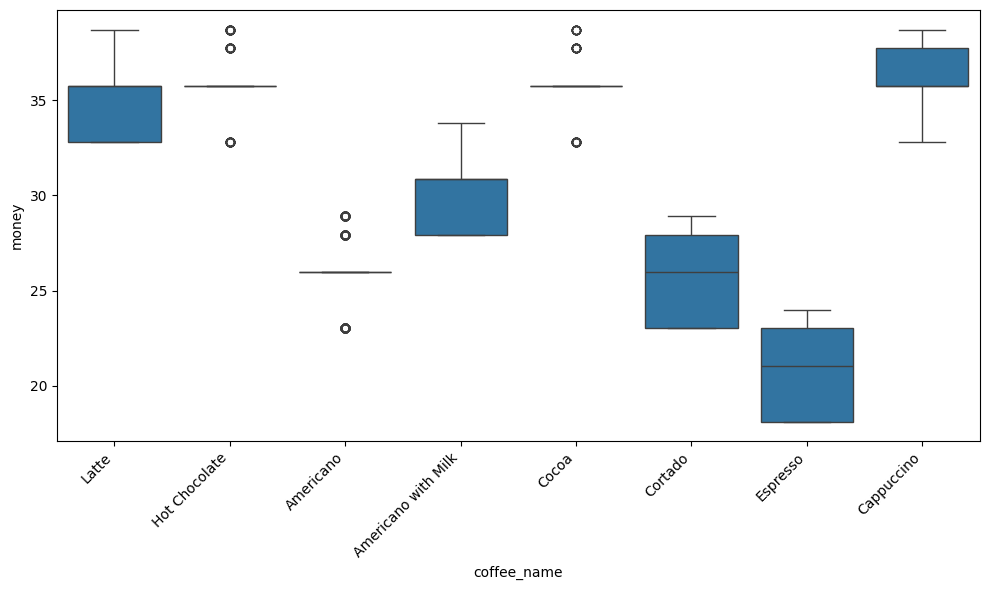

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='coffee_name', y='money', data=coffee_data)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
coffee_data['Time_of_Day'].value_counts()
num_coffee_types = coffee_data['coffee_name'].nunique()
print(f"There are {num_coffee_types} types of coffees in the dataset.")

There are 8 types of coffees in the dataset.


In [ ]:
coffee_data.groupby('coffee_name')['money'].max()

,money
coffee_name,
Americano,28.9
Americano with Milk,33.8
Cappuccino,38.7
Cocoa,38.7
Cortado,28.9
Espresso,24.0
Hot Chocolate,38.7
Latte,38.7


In [ ]:
average_money_by_time_of_day = coffee_data.groupby('Time_of_Day')['money'].mean()
display(average_money_by_time_of_day)
date_range= date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")
values = np.cumsum(np.random.randn(100))
df = pd.DataFrame({"date": date_range, "value": values})
df

,money
Time_of_Day,
Afternoon,31.643187
Morning,30.422693
Night,32.890904


,date,value
0,2023-01-01,-0.104105
1,2023-01-02,-0.011600
2,2023-01-03,0.030234
3,2023-01-04,0.229663
4,2023-01-05,0.697770
...,...,...
95,2023-04-06,-9.228997
96,2023-04-07,-8.804352
97,2023-04-08,-9.517309
98,2023-04-09,-9.651939


In [ ]:
num_synthetic_rows = 100
synthetic_data = pd.DataFrame()

# Generate data for each column based on existing data characteristics
for col in coffee_data.columns:
    if coffee_data[col].dtype == 'object':
        # For object type, sample from existing unique values
        synthetic_data[col] = np.random.choice(coffee_data[col].unique(), size=num_synthetic_rows)
    elif coffee_data[col].dtype in ['int64', 'float64']:
        # For numerical types, generate random numbers within the range of existing data
        min_val = coffee_data[col].min()
        max_val = coffee_data[col].max()
        if coffee_data[col].dtype == 'int64':
            synthetic_data[col] = np.random.randint(min_val, max_val + 1, size=num_synthetic_rows)
        else:
            synthetic_data[col] = np.random.uniform(min_val, max_val, size=num_synthetic_rows)
    elif coffee_data[col].dtype == 'datetime64[ns]':
        # For datetime, generate random dates within the range of existing data
        min_date = coffee_data[col].min()
        max_date = coffee_data[col].max()
        synthetic_data[col] = pd.to_datetime(np.random.uniform(min_date.value, max_date.value, num_synthetic_rows))

# Concatenate the original and synthetic dataframes
combined_coffee_data = pd.concat([coffee_data, synthetic_data], ignore_index=True)

print("Original data shape:", coffee_data.shape)
print("Synthetic data shape:", synthetic_data.shape)
print("Combined data shape:", combined_coffee_data.shape)
display(combined_coffee_data.head())

Original data shape: (3547, 13)
Synthetic data shape: (100, 12)
Combined data shape: (3647, 13)


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,Month,Year
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,3.0,2024
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,3.0,2024
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,3.0,2024
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,3.0,2024
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,3.0,2024


Number of columns in combined data: 13
Number of duplicate columns in combined data: 0

Missing values per column in combined data:
hour_of_day      0
cash_type        0
money            0
coffee_name      0
Time_of_Day      0
Weekday          0
Month_name       0
Weekdaysort      0
Monthsort        0
Date             0
Time             0
Month          100
Year             0
dtype: int64

Basic statistics of combined data:


,hour_of_day,money,Weekdaysort,Monthsort,Date,Month,Year
count,3647.000000,3647.000000,3647.000000,3647.000000,3647,3547.000000,3647.000000
mean,14.187826,31.540209,3.842062,6.455443,2024-10-03 06:58:52.247971840,6.453905,2024.273101
min,6.000000,18.120000,1.000000,1.000000,2024-03-01 00:00:00,1.000000,2024.000000
25%,10.000000,27.920000,2.000000,3.000000,2024-07-10 00:00:00,3.000000,2024.000000
50%,14.000000,32.820000,4.000000,7.000000,2024-10-08 00:00:00,7.000000,2024.000000
75%,18.000000,35.760000,6.000000,10.000000,2025-01-09 00:00:00,10.000000,2025.000000
max,22.000000,38.700000,7.000000,12.000000,2025-03-23 00:00:00,12.000000,2025.000000
std,4.253498,4.944097,1.973566,3.495962,NaN,3.500754,0.445613



Average money by year in combined data:


,money
Year,
2024,31.620679
2025,31.314019



Datatype of average money by year data:
float64

Maximum money by month in combined data:


,money
Month,
1,35.760000
2,35.760000
3,38.700000
4,38.700000
5,37.812762
6,37.720000
7,37.720000
8,35.039557
9,36.917664



Distribution of money over months in combined data:


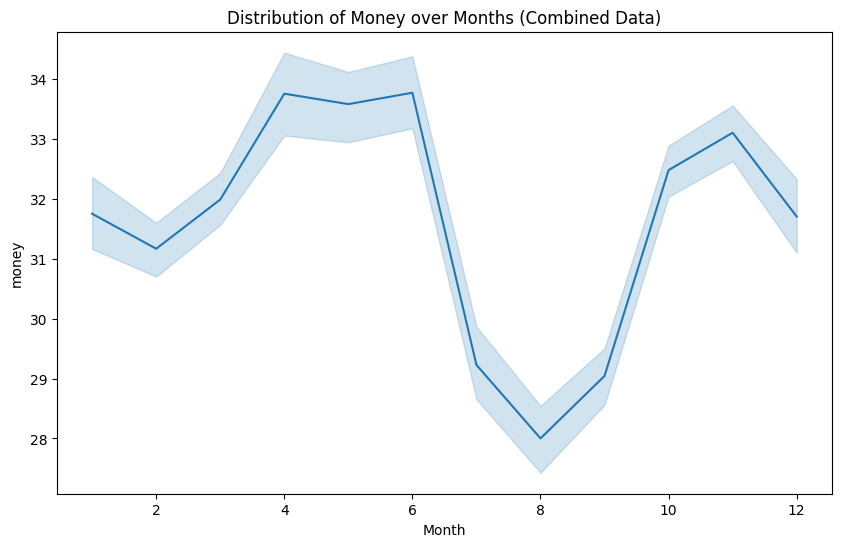


Density of money over years in combined data:


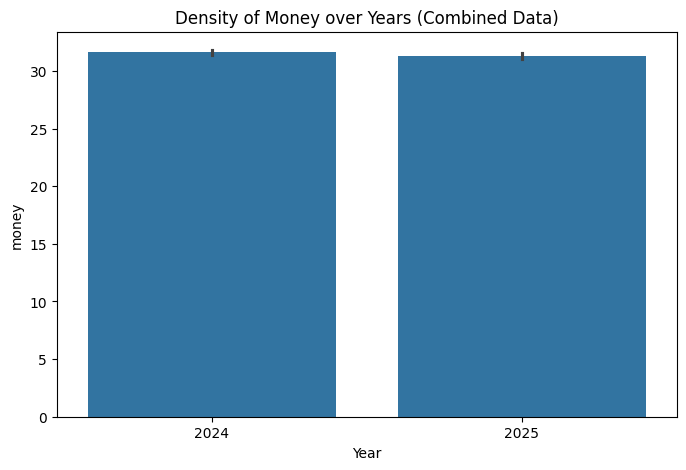


Distribution of money over coffee names in combined data:


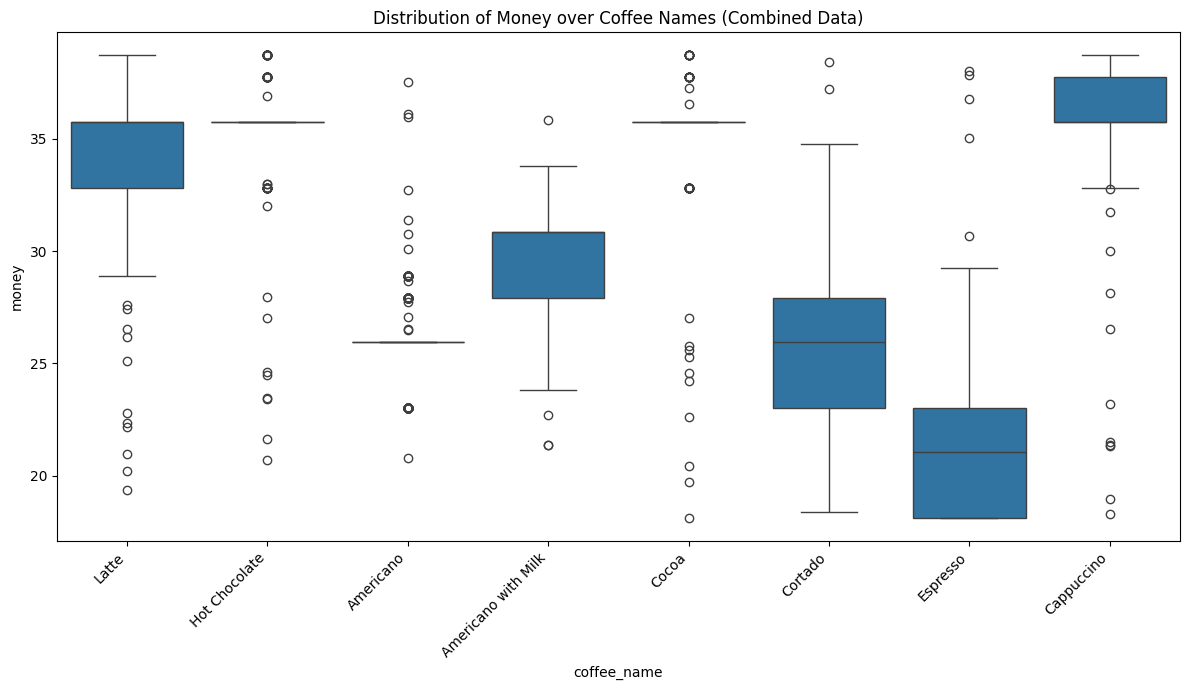


Times of the Day in combined data:


,count
Time_of_Day,
Afternoon,1229
Morning,1227
Night,1191



There are 8 types of coffees in the combined dataset.

Max money from coffee name in combined data:


,money
coffee_name,
Americano,37.513479
Americano with Milk,35.823358
Cappuccino,38.700000
Cocoa,38.700000
Cortado,38.404401
Espresso,37.993640
Hot Chocolate,38.700000
Latte,38.700000



Average money by time of day in combined data:


,money
Time_of_Day,
Afternoon,31.585972
Morning,30.294114
Night,32.776747


In [ ]:
# 1. Find the number of columns, duplicate columns, and missing values
num_columns_combined = combined_coffee_data.shape[1]
print(f"Number of columns in combined data: {num_columns_combined}")

# Check for duplicate columns (by comparing column content)
duplicate_columns_combined = combined_coffee_data.T.duplicated().sum()
print(f"Number of duplicate columns in combined data: {duplicate_columns_combined}")

# Check for missing values
missing_values_combined = combined_coffee_data.isnull().sum()
print("\nMissing values per column in combined data:")
print(missing_values_combined)

# 2. Basic statistics of the data
print("\nBasic statistics of combined data:")
display(combined_coffee_data.describe())

# Ensure 'Date' and 'Year' columns are in correct format before proceeding with time-based analysis
if 'Date' in combined_coffee_data.columns:
    combined_coffee_data['Date'] = pd.to_datetime(combined_coffee_data['Date'], errors='coerce')
    combined_coffee_data['Month'] = combined_coffee_data['Date'].dt.month
    combined_coffee_data['Year'] = combined_coffee_data['Date'].dt.year.astype('Int64') # Use Int64 to handle potential NaT from coercion

# Drop rows where 'Year' is null after coercion for accurate time-based analysis
combined_coffee_data.dropna(subset=['Year'], inplace=True)
combined_coffee_data['Year'] = combined_coffee_data['Year'].astype(int) # Convert back to int after dropping nulls

# 3. Average money for each year
if 'Year' in combined_coffee_data.columns and 'money' in combined_coffee_data.columns:
    average_money_by_year_combined = combined_coffee_data.groupby('Year')['money'].mean()
    print("\nAverage money by year in combined data:")
    display(average_money_by_year_combined)

# 4. Find the datatype of grouped_data (using the average money by year data)
if 'Year' in combined_coffee_data.columns and 'money' in combined_coffee_data.columns:
    print("\nDatatype of average money by year data:")
    print(average_money_by_year_combined.dtypes)

# 5. Find the maximum money for each month
if 'Month' in combined_coffee_data.columns and 'money' in combined_coffee_data.columns:
    max_money_by_month_combined = combined_coffee_data.groupby('Month')['money'].max()
    print("\nMaximum money by month in combined data:")
    display(max_money_by_month_combined)

# 6. Distribution of money over months
if 'Month' in combined_coffee_data.columns and 'money' in combined_coffee_data.columns:
    print("\nDistribution of money over months in combined data:")
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Month', y='money', data=combined_coffee_data)
    plt.title('Distribution of Money over Months (Combined Data)')
    plt.show()

# 7. The density of money over years
if 'Year' in combined_coffee_data.columns and 'money' in combined_coffee_data.columns:
    print("\nDensity of money over years in combined data:")
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Year', y='money', data=combined_coffee_data)
    plt.title('Density of Money over Years (Combined Data)')
    plt.show()

# 8. Find the distribution of money over coffee names
if 'coffee_name' in combined_coffee_data.columns and 'money' in combined_coffee_data.columns:
    print("\nDistribution of money over coffee names in combined data:")
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='coffee_name', y='money', data=combined_coffee_data)
    plt.xticks(rotation=45, ha='right')
    plt.title('Distribution of Money over Coffee Names (Combined Data)')
    plt.tight_layout()
    plt.show()

# 9. Times of the Day the dataset holds
if 'Time_of_Day' in combined_coffee_data.columns:
    print("\nTimes of the Day in combined data:")
    display(combined_coffee_data['Time_of_Day'].value_counts())

# 10. How many types of coffees are present in the dataset?
if 'coffee_name' in combined_coffee_data.columns:
    num_coffee_types_combined = combined_coffee_data['coffee_name'].nunique()
    print(f"\nThere are {num_coffee_types_combined} types of coffees in the combined dataset.")

# 11. Max money from coffee_name
if 'coffee_name' in combined_coffee_data.columns and 'money' in combined_coffee_data.columns:
    print("\nMax money from coffee name in combined data:")
    display(combined_coffee_data.groupby('coffee_name')['money'].max())

# 12. Find the average money made at what time of the day.
if 'Time_of_Day' in combined_coffee_data.columns and 'money' in combined_coffee_data.columns:
    average_money_by_time_of_day_combined = combined_coffee_data.groupby('Time_of_Day')['money'].mean()
    print("\nAverage money by time of day in combined data:")
    display(average_money_by_time_of_day_combined)